## Проект для БФ Рауль

### Техническое задание

Аналитикам данных нужно будет построить дэшборд. Дэшборд располагается на ресурсе, доступном сотрудникам организации БФ Рауль (https://raoul.spb.ru/).

Дэшборд отображает динамику и структуру трудоустройств.

**Параметры динамики:** помесячно, поквартально, ежегодно.

**Параметры структуры:** принадлежность благополучателя к одному из сегментов, ответственная НКО, регион, пол благополучателя, возраст, тип трудоустройства (временное, постоянное с сопровождением, постоянное без сопровождения), тип работодателя (внутренняя защищённая площадка, внешняя защищённая площадка, открытый рынок).

**Параметры трудоустройства:** от 1 дня, от 1 месяца

Back-end дэшборда можно редактировать без привлечения внешних специалистов (например, этим может заниматься специалист по мониторингу и оценке)


## Цель исследования: 

Построить дэшборд для организации БФ Рауль 

## Задачи:

1. Подготовить данные  на основе предоставленного датасета
2. Провести исследовательский анализ данных
3. Проанализировать динамику трудоустройства  по категориям, полу, возрасту, типу опыта работы, типу площадки, в разрезе временных промежутков, регионов
4. Провести исследовательский анализ данных 
5. Сформулировать гипотезы и проверить их
6. Разработать дэшборд на основании исследования

### Описание данных

Датасет содержит информацию о 259 трудоустройствах благополучателей благотворительного фонда Рауль за период с 2022 по 2023 год:

Колонки в  *БФРауль_Данные_по_трудоустроенным.csv* :

- `id_кандидата` — идентификатор благополучателя;
- `пол` — пол благополучателя;
- `возраст` — возраст благополучателя на момент трудоустройства;
- `дата_добавления` — дата регистрации благополучателя в систему БФ Рауль;
- `инвалидность` — наличие или отсутствие у благополучателя инвалидности (булево значение);
- `сиротский_опыт` — наличие или отсутствие у благополучателя сиротского опыта (булево значение);
- `адаптированная_образовательная_программа` — благополучатель учился по адаптированной образовательной программе (булево значение);
- `начало_трудоустройства` — дата начала трудоустройства благополучателя;
- `завершение_трудоустройства` — дата завершения трудоустройства благополучателя;
- `1+_месяц_работы` — благополучатель отработал больше 1 месяца на предоставленном месте работы (булево значение);
- `тип_площадки` — два значения - Внутренняя и Внешняя;
- `тип_трудоустройства` — три значения - Временное трудоустройство, Открытый рынок с сопровождением, Открытый рынок без сопровождения;
- `тип_опыта_работы` — какая для кандидата это работа по счету в рамках предоставления услуги по трудоустройству БФ Рауль. Два значения - Первый и Повторный;
- `регион_код` — идентификатор региона, сюда входят, как регион БФ Рауль, так и независимые организации (НКО-провайдеры франшизы проекта "Все получится");
- `провайдер_код` — идентификатор провайдера, сюда входят, как БФ Рауль, так и независимые организации (НКО-провайдеры франшизы проекта "Все получится") .

### Загрузка данных и изучение общей информации

In [1]:
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta
import seaborn as sns
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway


In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS6uRFUM0QuHT7OO6FyO-Pq8XB-SNEnUacTcaJcXYVMHy36YUKevEc2iG0yXrCBSg/pub?output=csv')

In [3]:
df.head()

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
0,0,1,Женский,25,2018-12-06 00:00:00,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-16 00:00:00,NaN,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
1,1,2,Мужской,28,2021-09-22 00:00:00,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-09 00:00:00,NaN,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
2,2,3,Женский,31,2016-07-08 00:00:00,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18 00:00:00,2023-06-30 00:00:00,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
3,3,4,Мужской,34,2022-10-07 00:00:00,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21 00:00:00,2022-12-30 00:00:00,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,4,Мужской,34,2022-10-07 00:00:00,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22 00:00:00,2023-03-30 00:00:00,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Unnamed: 0                                259 non-null    int64 
 1   id_кандидата                              259 non-null    int64 
 2   пол                                       259 non-null    object
 3   возраст                                   259 non-null    int64 
 4   дата_добавления                           258 non-null    object
 5   инвалидность                              259 non-null    object
 6   сиротский_опыт                            259 non-null    object
 7   адаптированная_образовательная_программа  259 non-null    object
 8   начало_трудоустройства                    259 non-null    object
 9   завершение_трудоустройства                85 non-null     object
 10  1+_месяц_работы                           259 non-

### Дату приводим к нужному виду

In [5]:
df['дата_добавления'] = pd.to_datetime(df['дата_добавления'])
df['начало_трудоустройства'] = pd.to_datetime(df['начало_трудоустройства']) 
df['завершение_трудоустройства'] = pd.to_datetime(df['завершение_трудоустройства'])

In [6]:
#проверяем смену типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Unnamed: 0                                259 non-null    int64         
 1   id_кандидата                              259 non-null    int64         
 2   пол                                       259 non-null    object        
 3   возраст                                   259 non-null    int64         
 4   дата_добавления                           258 non-null    datetime64[ns]
 5   инвалидность                              259 non-null    object        
 6   сиротский_опыт                            259 non-null    object        
 7   адаптированная_образовательная_программа  259 non-null    object        
 8   начало_трудоустройства                    259 non-null    datetime64[ns]
 9   завершение_трудоустройства      

In [7]:
# посмотрим кол-во строк и столбцов
df.shape

(259, 16)

### Проверяем на дубликаты

In [8]:
df.duplicated().sum()

0

In [9]:
(df['id_кандидата'].value_counts())

4      3
169    3
242    2
30     2
134    2
      ..
88     1
89     1
90     1
91     1
122    1
Name: id_кандидата, Length: 242, dtype: int64

In [10]:
# смотрим кол-во дубликатов по столбцу id_кандидата
dup = df[df.duplicated(['id_кандидата'])]
dup

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
5,5,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-31,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
32,32,30,Мужской,24,2021-03-23,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-08-28,NaT,ЛОЖЬ,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
39,39,36,Мужской,35,2016-07-12,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-01,NaT,ИСТИНА,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
66,66,62,Мужской,21,2018-05-16,ЛОЖЬ,ЛОЖЬ,ЛОЖЬ,2023-08-24,NaT,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
104,104,99,Мужской,32,2016-07-19,ЛОЖЬ,ИСТИНА,ИСТИНА,2023-03-27,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
140,140,134,Мужской,27,2022-08-01,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-06-16,NaT,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3501
143,143,136,Женский,24,2023-04-07,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-06-01,NaT,ИСТИНА,Внутренняя,Временное трудоустройство,Повторный,reg200,prov3501
148,148,140,Женский,32,2022-12-16,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-03-17,NaT,ИСТИНА,Внешняя,Временное трудоустройство,Повторный,reg200,prov3501
168,168,159,Мужской,22,2023-04-27,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-06-01,NaT,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3501


In [11]:
#посмотрим подробнее дубликаты
dup_id = df[df.duplicated(subset='id_кандидата', keep=False)]

In [12]:
duplicate_percentage = len(dup_id)/len(df) * 100
print(f"Дубликаты: {duplicate_percentage:.2f}%")

Дубликаты: 12.36%


In [13]:
#проверим есть ли пересечения между категориями кандидатов
df[['id_кандидата','инвалидность','сиротский_опыт', 'адаптированная_образовательная_программа']].duplicated().sum()

16

In [14]:
cols = ['id_кандидата', 'инвалидность', 'сиротский_опыт', 'адаптированная_образовательная_программа']

dup_row = df[df[cols].duplicated(keep=False)]
dup_row

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
5,5,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-31,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
31,31,30,Мужской,24,2021-03-23,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-03-09,2023-06-30,ИСТИНА,Внешняя,Временное трудоустройство,Первый,reg200,prov3500
32,32,30,Мужской,24,2021-03-23,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-08-28,NaT,ЛОЖЬ,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
38,38,36,Мужской,35,2016-07-12,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-07,2023-02-28,ИСТИНА,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
39,39,36,Мужской,35,2016-07-12,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-01,NaT,ИСТИНА,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
103,103,99,Мужской,32,2016-07-19,ЛОЖЬ,ИСТИНА,ИСТИНА,2022-11-07,2023-03-10,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
104,104,99,Мужской,32,2016-07-19,ЛОЖЬ,ИСТИНА,ИСТИНА,2023-03-27,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
139,139,134,Мужской,27,2022-08-01,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-05-02,2023-05-31,ЛОЖЬ,Внутренняя,Временное трудоустройство,Первый,reg200,prov3501


In [15]:
duplicate_percentage = len(dup_row)/len(df) * 100
print(f"Дубликаты по категориям: {duplicate_percentage:.2f}%")

Дубликаты по категориям: 11.58%


In [16]:
#проверим есть ли пересечения между категориями кандидатов по типу опыта первичный или повторный
df[['id_кандидата','тип_опыта_работы']].duplicated().sum()

6

In [17]:
cols = ['id_кандидата','тип_опыта_работы']

dup_rows = df[df[cols].duplicated(keep=False)]
dup_rows

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
5,5,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-31,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
38,38,36,Мужской,35,2016-07-12,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-07,2023-02-28,ИСТИНА,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
39,39,36,Мужской,35,2016-07-12,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-01,NaT,ИСТИНА,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
65,65,62,Мужской,21,2018-05-16,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-04-24,2023-06-30,ИСТИНА,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
66,66,62,Мужской,21,2018-05-16,ЛОЖЬ,ЛОЖЬ,ЛОЖЬ,2023-08-24,NaT,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
103,103,99,Мужской,32,2016-07-19,ЛОЖЬ,ИСТИНА,ИСТИНА,2022-11-07,2023-03-10,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
104,104,99,Мужской,32,2016-07-19,ЛОЖЬ,ИСТИНА,ИСТИНА,2023-03-27,NaT,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
179,179,169,Мужской,24,2022-03-23,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-06-18,2023-07-19,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3501


In [18]:
duplicate_percentage = len(dup_rows)/len(df) * 100
print(f"Дубликаты: {duplicate_percentage:.2f}%")

Дубликаты: 4.25%


#### Видим, что все дубликаты это данные о нескольких трудоустройствах одного благополучателя, т.е. он несколько раз устравался на работу. Дубликаты по категориям, в основном связаны с тем, что неторые кандидаты с инвалидностью учились на адаптированной учебной программе, также есть кандидаты с сиротским опытом, учившиеся на на адаптированной учебной программе  и это абсолютно нормально, поэтому данные оставляем как есть

In [19]:
# проверяем на неявные дубликаты

df.id_кандидата.sort_values().nunique()

242

In [20]:
df.id_кандидата.sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [21]:
df.пол.sort_values().nunique()

2

In [22]:
df.пол.sort_values().unique()

array(['Женский', 'Мужской'], dtype=object)

In [23]:
df.возраст.sort_values().nunique()

23

In [24]:
df.возраст.sort_values().unique()

array([14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
       31, 32, 33, 34, 35, 39], dtype=int64)

In [25]:
df.дата_добавления.sort_values().nunique()

173

In [26]:
df.инвалидность.sort_values().nunique()

2

In [27]:
df.инвалидность.sort_values().unique()

array(['ИСТИНА', 'ЛОЖЬ'], dtype=object)

In [28]:
df.сиротский_опыт.sort_values().nunique()

2

In [29]:
df.сиротский_опыт.sort_values().unique()

array(['ИСТИНА', 'ЛОЖЬ'], dtype=object)

In [30]:
df.адаптированная_образовательная_программа.sort_values().nunique()

2

In [31]:
df.адаптированная_образовательная_программа.sort_values().unique()

array(['ИСТИНА', 'ЛОЖЬ'], dtype=object)

In [32]:
df['1+_месяц_работы'].sort_values().unique()

array(['ИСТИНА', 'ЛОЖЬ'], dtype=object)

In [33]:
df.тип_площадки.sort_values().nunique()

2

In [34]:
df.тип_площадки.sort_values().unique()

array(['Внешняя', 'Внутренняя', nan], dtype=object)

In [35]:
df.тип_трудоустройства.sort_values().nunique()

3

In [36]:
df.тип_трудоустройства.sort_values().unique()

array(['Временное трудоустройство', 'Открытый рынок без сопровождения',
       'Открытый рынок с сопровождением', nan], dtype=object)

In [37]:
df.тип_опыта_работы.sort_values().nunique()

2

In [38]:
df.тип_опыта_работы.sort_values().unique()

array(['Первый', 'Повторный', nan], dtype=object)

In [39]:
df.регион_код.sort_values().nunique()

9

In [40]:
df.регион_код.sort_values().unique()

array(['reg200', 'reg201', 'reg203', 'reg204', 'reg205', 'reg206',
       'reg207', 'reg208', 'reg209'], dtype=object)

In [41]:
df.провайдер_код.sort_values().nunique()

8

In [42]:
df.провайдер_код.sort_values().unique()

array(['prov3500', 'prov3501', 'prov3502', 'prov3503', 'prov3504',
       'prov3505', 'prov3506', 'prov3507'], dtype=object)

### Проверяем на пропуски

In [43]:
df.isna().sum()

Unnamed: 0                                    0
id_кандидата                                  0
пол                                           0
возраст                                       0
дата_добавления                               1
инвалидность                                  0
сиротский_опыт                                0
адаптированная_образовательная_программа      0
начало_трудоустройства                        0
завершение_трудоустройства                  174
1+_месяц_работы                               0
тип_площадки                                  1
тип_трудоустройства                           1
тип_опыта_работы                              1
регион_код                                    0
провайдер_код                                 0
dtype: int64

##### При уточнении ТЗ у заказчика выяснили, если дата заверешения трудоустройства отсутствует, то значит, что благополучатель еще работает на последнем месте работы. Для дальнейшего удобства работы заменим на текущую дату. Также есть по 1 пропуску в столбцах дата_добавления, тип_площадки, 1+_месяц_работы, тип_опыта_работы. Кол-во не значительное, поэтому пропуски также не трогаем, т.к. для заказчика важно сохранить абсолютно все данные

In [44]:
fill_date = datetime(2023, 11, 19) 

df['завершение_трудоустройства'] = df['завершение_трудоустройства'].fillna(fill_date)

In [45]:
df.head(10)

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код
0,0,1,Женский,25,2018-12-06,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-16,2023-11-19,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
1,1,2,Мужской,28,2021-09-22,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-09,2023-11-19,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
2,2,3,Женский,31,2016-07-08,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18,2023-06-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
5,5,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-31,2023-11-19,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500
6,6,5,Мужской,16,2023-03-01,ЛОЖЬ,ИСТИНА,ЛОЖЬ,2023-04-28,2023-06-15,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Первый,reg200,prov3500
7,7,6,Женский,28,2016-08-01,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-28,2023-11-19,ИСТИНА,Внешняя,Временное трудоустройство,Повторный,reg200,prov3500
8,8,7,Женский,33,2020-12-21,ИСТИНА,ЛОЖЬ,ИСТИНА,2023-03-01,2023-05-31,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500
9,9,8,Мужской,21,2022-06-17,ИСТИНА,ИСТИНА,ИСТИНА,2023-03-09,2023-11-19,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500


### Создадим столбец c периодом трудоустройства от начала до завершения трудоустройства


In [46]:
df['период_трудоустройства_в_днях'] = (df['завершение_трудоустройства'] - df['начало_трудоустройства']).dt.days
df.head()

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,1+_месяц_работы,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код,период_трудоустройства_в_днях
0,0,1,Женский,25,2018-12-06,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-16,2023-11-19,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,307
1,1,2,Мужской,28,2021-09-22,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-09,2023-11-19,ИСТИНА,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500,314
2,2,3,Женский,31,2016-07-08,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18,2023-06-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,73
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,ИСТИНА,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,39
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,ЛОЖЬ,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,8


###  Создадим столбец с месяцем и годом начала трудоустройства

In [47]:
df['год_начала_трудоустройства'] = df['начало_трудоустройства'].dt.year
df['месяц_начала_трудоустройства'] = df['начало_трудоустройства'].dt.month#astype('datetime64[M]')

###  Создадим столбец с месяцем и годом и завершения трудоустройства

In [48]:
df['год_завершения_трудоустройства'] = df['завершение_трудоустройства'].dt.year
df['месяц_завершения_трудоустройства'] = df['завершение_трудоустройства'].dt.month#astype('datetime64[M]')

In [49]:
df.head()

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,...,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код,период_трудоустройства_в_днях,год_начала_трудоустройства,месяц_начала_трудоустройства,год_завершения_трудоустройства,месяц_завершения_трудоустройства
0,0,1,Женский,25,2018-12-06,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-16,2023-11-19,...,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,307,2023,1,2023,11
1,1,2,Мужской,28,2021-09-22,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-09,2023-11-19,...,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500,314,2023,1,2023,11
2,2,3,Женский,31,2016-07-08,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18,2023-06-30,...,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,73,2023,4,2023,6
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,...,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,39,2022,11,2022,12
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,...,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,8,2023,3,2023,3


In [50]:
#проверим, что тип данных верный
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Unnamed: 0                                259 non-null    int64         
 1   id_кандидата                              259 non-null    int64         
 2   пол                                       259 non-null    object        
 3   возраст                                   259 non-null    int64         
 4   дата_добавления                           258 non-null    datetime64[ns]
 5   инвалидность                              259 non-null    object        
 6   сиротский_опыт                            259 non-null    object        
 7   адаптированная_образовательная_программа  259 non-null    object        
 8   начало_трудоустройства                    259 non-null    datetime64[ns]
 9   завершение_трудоустройства      

### Проверяем на аномальные значения

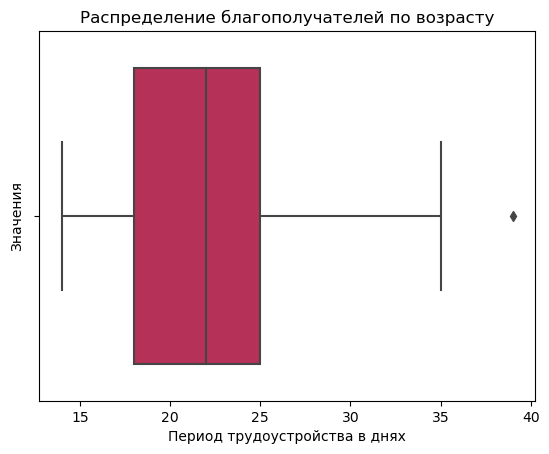

In [51]:
#Посмотрим столбец возраст
sns.boxplot(data=df, x='возраст', palette='rocket')
plt.xlabel('Период трудоустройства в днях')
plt.ylabel('Значения')
plt.title('Распределение благополучателей по возрасту');

In [52]:
#смотрим процент данных
(df['возраст'] > 35).mean() 

0.003861003861003861

##### Данных меньше 1%, это не критично для исследования

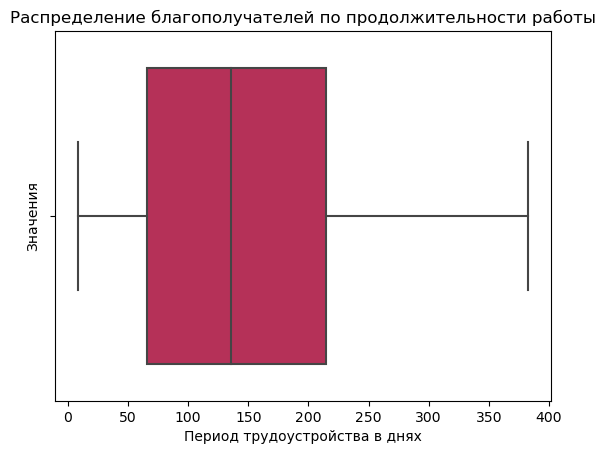

In [53]:
#Посмотрим столбец период_трудоустройства_в_днях
sns.boxplot(data=df, x='период_трудоустройства_в_днях', palette='rocket')
plt.xlabel('Период трудоустройства в днях')
plt.ylabel('Значения')
plt.title('Распределение благополучателей по продолжительности работы');

##### Здесь нет аномальных значений

<div style="border:solid purple 3px; padding: 20px">
Выполнили предобработку данных, выявили дубликаты, их наличие связано с тем, что кандидаты повторно искали работу, также с тем, что некоторые благополучатели относятся к нескольким категориям - инвалидность, сиротский опыт, адапт учебная программа. Это нормально, поэтому данные оставляем. Проверили формат данных, поменяли тип данных у даты, в остальном все верно. Проверили данные на пропуски, обнаружили большое кол-во пропусков по столбцу с датой заверешения трудоустройства. По сведениям от заказчика это значит, что благополучатель скорее всего еше работает на данном месте работы, поэтому для удобства данного исследования заполнили пропуски датой на момент исследования 19.11.2023г. Создали столбцы с общим периодом трудоустройства, столбцы с месяцем, годом начала и завершения трудоустройства для удобства дальнейшего исследования по периодам. 

## Анализ данных

### Проверим период, за который предосталены данные

In [54]:
df['дата_добавления'].min()

Timestamp('2016-07-08 00:00:00')

In [55]:
df['дата_добавления'].max()

Timestamp('2023-08-24 00:00:00')

In [56]:
df['начало_трудоустройства'].min()

Timestamp('2022-11-01 00:00:00')

In [57]:
df['начало_трудоустройства'].max()

Timestamp('2023-08-29 00:00:00')

In [58]:
df['завершение_трудоустройства'].min()

Timestamp('2022-12-30 00:00:00')

In [59]:
df['завершение_трудоустройства'].max()

Timestamp('2023-11-19 00:00:00')

<div style="border:solid green 3px; padding: 20px">
    Данные представлены за период: 

- по дате добавления с 08.07.2016 до 24.08.2023

- по дате начала трудоустройства с 01.11.2022 по 29.08.2022

- по дате завершения трудоустройства с 19.11.2019 по 30.12.2022

### Cоздадим датасет, оставив только уникальные id, т.к. это то, что интересует заказчика прежде всего

In [60]:
unique_df = df.drop_duplicates('id_кандидата')

### Посмотрим распределение благополучателей по полу 

In [61]:
пол_кандидата = df.groupby('пол')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
пол_кандидата['доля_от_общего, %'] = (пол_кандидата['количество_кандидатов'] / пол_кандидата['количество_кандидатов'].sum()*100).round(2)

пол_кандидата

,пол,количество_кандидатов,"доля_от_общего, %"
0,Женский,106,43.8
1,Мужской,136,56.2


In [62]:
unique_df.head()

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,...,тип_площадки,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код,период_трудоустройства_в_днях,год_начала_трудоустройства,месяц_начала_трудоустройства,год_завершения_трудоустройства,месяц_завершения_трудоустройства
0,0,1,Женский,25,2018-12-06,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-16,2023-11-19,...,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,307,2023,1,2023,11
1,1,2,Мужской,28,2021-09-22,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-09,2023-11-19,...,Внешняя,Открытый рынок с сопровождением,Повторный,reg200,prov3500,314,2023,1,2023,11
2,2,3,Женский,31,2016-07-08,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18,2023-06-30,...,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,73,2023,4,2023,6
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,...,Внешняя,Открытый рынок без сопровождения,Повторный,reg200,prov3500,39,2022,11,2022,12
6,6,5,Мужской,16,2023-03-01,ЛОЖЬ,ИСТИНА,ЛОЖЬ,2023-04-28,2023-06-15,...,Внешняя,Открытый рынок с сопровождением,Первый,reg200,prov3500,48,2023,4,2023,6


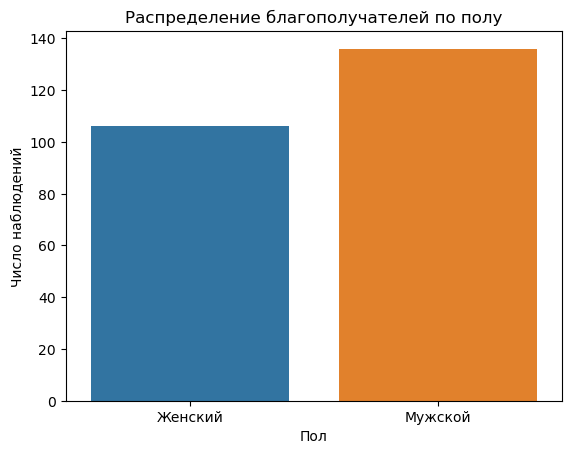

In [63]:
sns.countplot(data=unique_df, x='пол')
plt.xlabel('Пол')
plt.ylabel('Число наблюдений') 
plt.title('Распределение благополучателей по полу');

<div style="border:solid green 3px; padding: 20px">
Видим, что больше кандидов мужского пола, чем женского в датасете. Мужчин представлено  56.2%, женщин 43.8%


### Посмотрим распределение благополучателей по возрасту 

In [64]:
#посмотрим на кол-во кандидатов по возрасту 
df_возраст = unique_df.groupby('возраст')['id_кандидата'].agg(['count']).reset_index()
df_возраст = df_возраст.rename(columns={'count':'количество_кандидатов'})
df_возраст['доля_от_общего, %'] = (df_возраст['количество_кандидатов'] / df_возраст['количество_кандидатов'].sum()*100).round(2)
df_возраст.sort_values('доля_от_общего, %', ascending=False)

,возраст,количество_кандидатов,"доля_от_общего, %"
2,16,25,10.33
5,19,19,7.85
8,22,18,7.44
4,18,18,7.44
6,20,18,7.44
9,23,17,7.02
3,17,16,6.61
7,21,14,5.79
10,24,14,5.79
1,15,12,4.96


In [65]:
#Посмотрим на средний возраст и медиану трудоустроенных в общем
print('Средний возраст:', round(df['возраст'].mean(), 2))
print('Медиана возраста:', df['возраст'].median())

Средний возраст: 22.36
Медиана возраста: 22.0


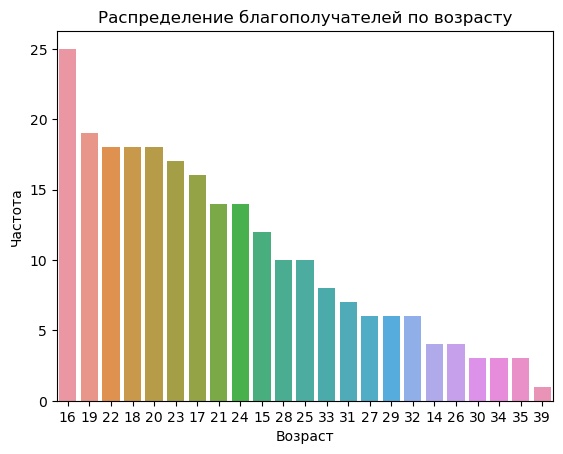

In [66]:
df_возраст = df_возраст.sort_values('количество_кандидатов', ascending=False)

order = df_возраст['возраст'].values

ax = sns.barplot(data=df_возраст, x='возраст', y='количество_кандидатов', order=order)

plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение благополучателей по возрасту')
plt.show()

<div style="border:solid green 3px; padding: 20px">

Видим, что больше всего благополучателей в возрасте 16 лет - 10.33%, затем идут кандидаты 18-20, 22 лет по 7.44%. Меньше всего благополучателей в возрасте 30, 34-35 - 1.24%, 39 лет- 0.41%. При этом средний возраст совпадает с медианой - 22 года. 

### Посмотрим распределение по категориям благополучателей

In [67]:
категория_инвалидность = df.groupby('инвалидность')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
категория_инвалидность['доля_от_общего, %'] = (категория_инвалидность['количество_кандидатов'] / категория_инвалидность['количество_кандидатов'].sum()*100).round(2)
категория_инвалидность

,инвалидность,количество_кандидатов,"доля_от_общего, %"
0,ИСТИНА,152,62.55
1,ЛОЖЬ,91,37.45


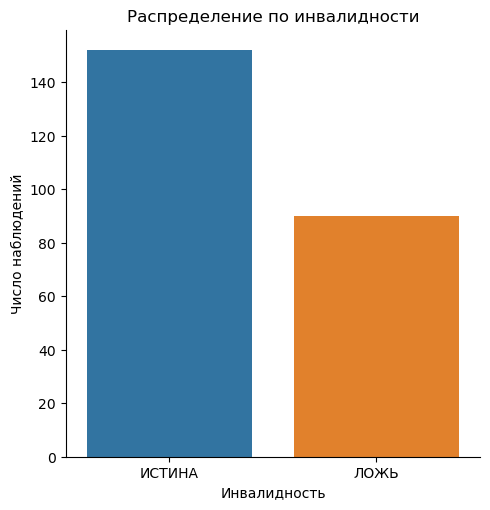

In [68]:
sns.catplot(data=unique_df, x='инвалидность', kind='count')
plt.xlabel('Инвалидность')
plt.ylabel('Число наблюдений')
plt.title('Распределение по инвалидности');

<div style="border:solid green 3px; padding: 20px">
Видим, что из всех благополучателей 62,55% имеют инвалидность

In [69]:
категория_сиротский_опыт = df.groupby('сиротский_опыт')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
категория_сиротский_опыт['доля_от_общего, %'] = (категория_сиротский_опыт['количество_кандидатов'] / категория_сиротский_опыт['количество_кандидатов'].sum()*100).round(2)
категория_сиротский_опыт

,сиротский_опыт,количество_кандидатов,"доля_от_общего, %"
0,ИСТИНА,85,35.12
1,ЛОЖЬ,157,64.88


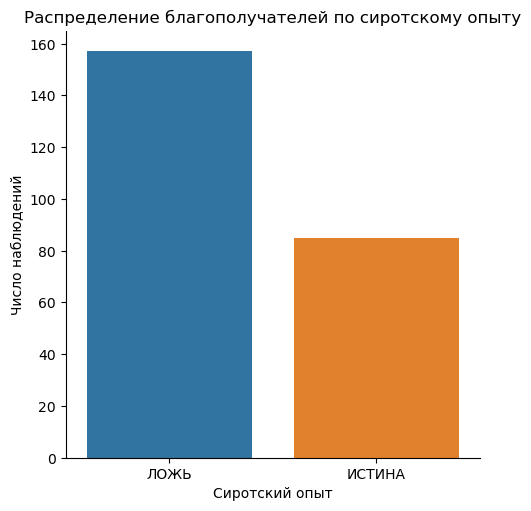

In [70]:
sns.catplot(data=unique_df, x='сиротский_опыт', kind='count')
plt.xlabel('Сиротский опыт')  
plt.ylabel('Число наблюдений')
plt.title('Распределение благополучателей по сиротскому опыту');

<div style="border:solid green 3px; padding: 20px">
Видим, что из всех благополучателей у 35.12% есть сиротский опыт    

In [71]:
категория_ад_обр_программа = df.groupby('адаптированная_образовательная_программа')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
категория_ад_обр_программа['доля_от_общего, %'] = (категория_ад_обр_программа['количество_кандидатов'] / категория_ад_обр_программа['количество_кандидатов'].sum()*100).round(2)
категория_ад_обр_программа

,адаптированная_образовательная_программа,количество_кандидатов,"доля_от_общего, %"
0,ИСТИНА,116,47.74
1,ЛОЖЬ,127,52.26


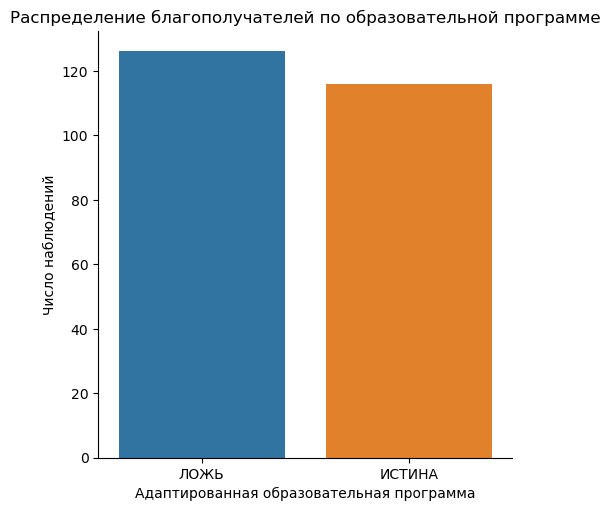

In [72]:
sns.catplot(data=unique_df, x='адаптированная_образовательная_программа', kind='count')
plt.xlabel('Адаптированная образовательная программа')
plt.ylabel('Число наблюдений')  
plt.title('Распределение благополучателей по образовательной программе');

<div style="border:solid green 3px; padding: 20px">
Видим, что 47.74% благополучателей училичь по адаптированной образовательной программе   

### Посмотрим распределение по столбцу более 1 месяца работы

In [73]:
один_месяц_работы = df.groupby('1+_месяц_работы')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
один_месяц_работы['доля_от_общего, %'] = (один_месяц_работы['количество_кандидатов'] / один_месяц_работы['количество_кандидатов'].sum()*100).round(2)
один_месяц_работы

,1+_месяц_работы,количество_кандидатов,"доля_от_общего, %"
0,ИСТИНА,205,80.71
1,ЛОЖЬ,49,19.29


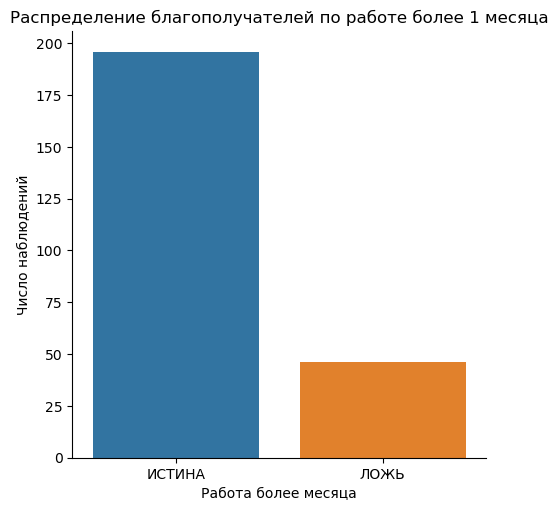

In [74]:
sns.catplot(data=unique_df, x='1+_месяц_работы', kind='count') 
plt.xlabel('Работа более месяца')
plt.ylabel('Число наблюдений')
plt.title('Распределение благополучателей по работе более 1 месяца');

<div style="border:solid green 3px; padding: 20px">
Больше 80.71% благополучателей проработали более 1 месяца    

### Посмотрим распределение по типу площадки

In [75]:
тип_площадки = df.groupby('тип_площадки')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
тип_площадки['доля_от_общего, %'] = (тип_площадки['количество_кандидатов'] / тип_площадки['количество_кандидатов'].sum()*100).round(2)
тип_площадки

,тип_площадки,количество_кандидатов,"доля_от_общего, %"
0,Внешняя,207,83.47
1,Внутренняя,41,16.53


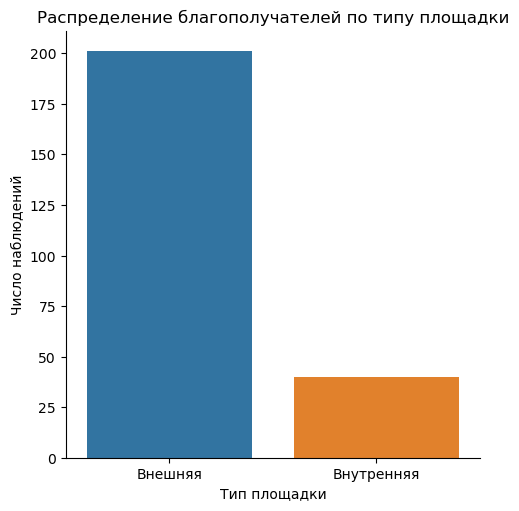

In [76]:
sns.catplot(data=unique_df, x='тип_площадки', kind='count')
plt.xlabel('Тип площадки')
plt.ylabel('Число наблюдений')
plt.title('Распределение благополучателей по типу площадки');

<div style="border:solid green 3px; padding: 20px">
Больше 83.47% благополучателей работали на внешних площадках, 16.53% на внутренних площадках. 

### Посмотрим распределение по типу трудоустройства

In [77]:
тип_трудоустройства = df.groupby('тип_трудоустройства')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
тип_трудоустройства = тип_трудоустройства.sort_values(by='количество_кандидатов', ascending=False)
тип_трудоустройства['доля_от_общего'] = (тип_трудоустройства['количество_кандидатов'] / тип_трудоустройства['количество_кандидатов'].sum()*100).round(2)
тип_трудоустройства

,тип_трудоустройства,количество_кандидатов,доля_от_общего
0,Временное трудоустройство,123,49.2
2,Открытый рынок с сопровождением,87,34.8
1,Открытый рынок без сопровождения,40,16.0


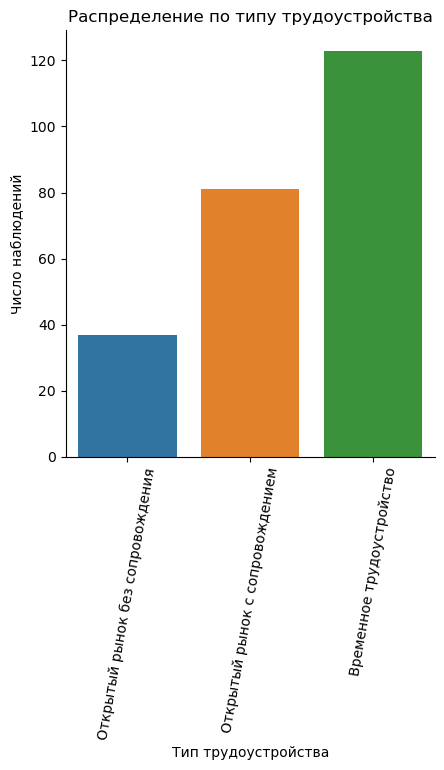

In [78]:
sns.catplot(data=unique_df, x='тип_трудоустройства', kind='count')
plt.xlabel('Тип трудоустройства')
plt.ylabel('Число наблюдений')  
plt.title('Распределение по типу трудоустройства')
plt.xticks(rotation=80);

<div style="border:solid green 3px; padding: 20px">
49.2% были временно трудоустроны, 34.8% благополучателей работали на открытом рынке с сопровождением, 16.0% благополучателей работали на открытом рынке без сопровождения. 

### Посмотрим распределение по типу опыта работы

In [79]:
тип_опыта_работы = df.groupby('тип_опыта_работы')['id_кандидата'].size().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
тип_опыта_работы['доля_от_общего'] = (тип_опыта_работы['количество_кандидатов'] / тип_опыта_работы['количество_кандидатов'].sum()*100).round(2)
тип_опыта_работы

,тип_опыта_работы,количество_кандидатов,доля_от_общего
0,Первый,189,73.26
1,Повторный,69,26.74


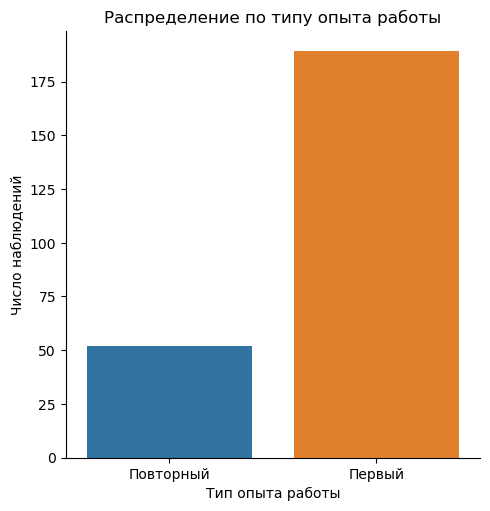

In [80]:
sns.catplot(data=unique_df, x='тип_опыта_работы', kind='count')
plt.xlabel('Тип опыта работы')
plt.ylabel('Число наблюдений')
plt.title('Распределение по типу опыта работы');

<div style="border:solid green 3px; padding: 20px">
73.26% благополучателей первый опыт работы. 26.74% благополучателей повторный опыт работы  

### Посмотрим распределение по коду региона

In [81]:
регион_код = df.groupby('регион_код')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
регион_код = регион_код.sort_values(by='количество_кандидатов', ascending=False)
регион_код['доля_от_общего, %'] = (регион_код['количество_кандидатов'] / регион_код['количество_кандидатов'].sum()*100).round(2)
регион_код

,регион_код,количество_кандидатов,"доля_от_общего, %"
0,reg200,174,71.90
1,reg201,17,7.02
3,reg204,17,7.02
6,reg207,14,5.79
8,reg209,9,3.72
2,reg203,5,2.07
4,reg205,2,0.83
5,reg206,2,0.83
7,reg208,2,0.83


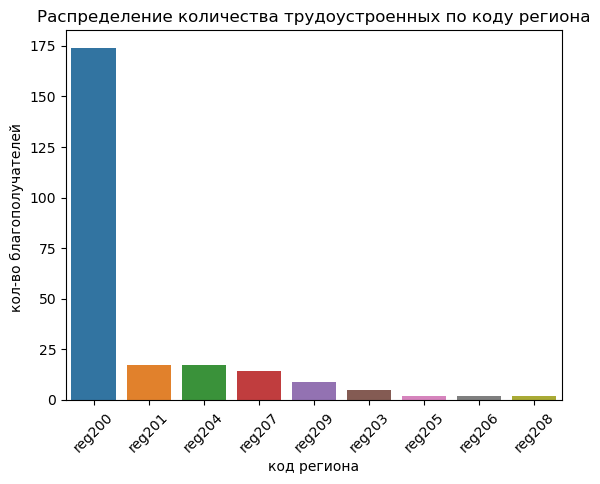

In [82]:
df_grouped = unique_df.groupby('регион_код')['id_кандидата'].agg(['count']).reset_index()

df_grouped = df_grouped.sort_values('count', ascending=False)

ax = sns.barplot(data=df_grouped, x='регион_код', y='count')

plt.xlabel('код региона')
plt.ylabel('кол-во благополучателей ')
plt.title('Распределение количества трудоустроенных по коду региона')
plt.xticks(rotation=45)
plt.show()

<div style="border:solid green 3px; padding: 20px">
71.90% благополучателей из региона с кодом reg200, меньше всего из региона с кодом reg205, reg206, reg208

### Посмотрим распределение по коду провайдера

In [83]:
провайдер_код = df.groupby('провайдер_код')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
провайдер_код = провайдер_код.sort_values(by='количество_кандидатов', ascending=False)
провайдер_код['доля_от_общего, %'] = (провайдер_код['количество_кандидатов'] / провайдер_код['количество_кандидатов'].sum()*100).round(2)
провайдер_код

,провайдер_код,количество_кандидатов,"доля_от_общего, %"
0,prov3500,131,54.13
1,prov3501,43,17.77
5,prov3505,18,7.44
2,prov3502,17,7.02
4,prov3504,17,7.02
7,prov3507,9,3.72
3,prov3503,5,2.07
6,prov3506,2,0.83


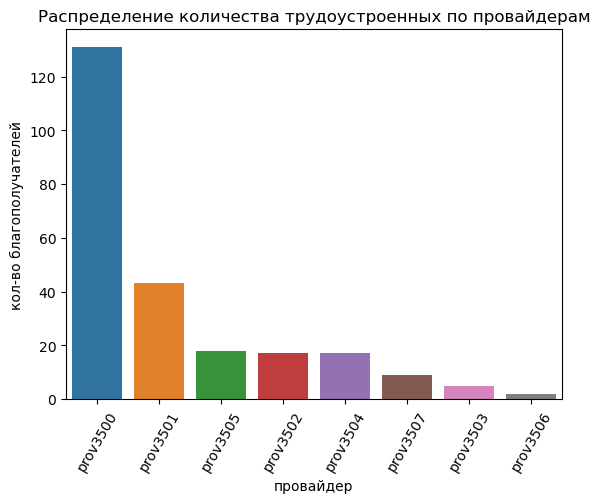

In [84]:
df_grouped = unique_df.groupby('провайдер_код')['id_кандидата'].agg(['count']).reset_index()

df_grouped = df_grouped.sort_values('count', ascending=False)

ax = sns.barplot(data=df_grouped, x='провайдер_код', y='count')

plt.xlabel('провайдер')
plt.ylabel('кол-во благополучателей')
plt.title('Распределение количества трудоустроенных по провайдерам')
plt.xticks(rotation=60)
plt.show()

<div style="border:solid green 3px; padding: 20px">
Больше всего благополучателей находятся у провайдера prov3500 - 54.13%, затем идет провайдер prov3501 - 17.77%. Меньше всего у провайдера prov3503 -2.07% и prov3506 - 0.83%. 	

###  Посмотрим, сколько в среднем дней благополучатели работают на одном месте

In [85]:
round(df['период_трудоустройства_в_днях'].mean(), 2)

148.2

In [86]:
df['период_трудоустройства_в_днях'].median()

136.0

###  Посмотрим на распределение кандидатов по длительности трудоустройства

In [87]:
#посмотрим на кол-во кандидатов по периоду трудоустройства
df_grouped = unique_df.groupby('период_трудоустройства_в_днях')['id_кандидата'].agg(['count']).reset_index()
df_grouped = df_grouped.rename(columns={'count':'количество_кандидатов'}).sort_values(by='количество_кандидатов', ascending=False).head(20)
total_count = len(unique_df)
df_grouped['доля от отщего, %'] = round(100 * df_grouped['количество_кандидатов'] / total_count, 2)
df_grouped

,период_трудоустройства_в_днях,количество_кандидатов,"доля от отщего, %"
16,48,11,4.55
97,230,9,3.72
45,110,8,3.31
9,29,6,2.48
35,91,6,2.48
3,18,5,2.07
8,28,5,2.07
84,186,5,2.07
18,51,5,2.07
64,149,4,1.65


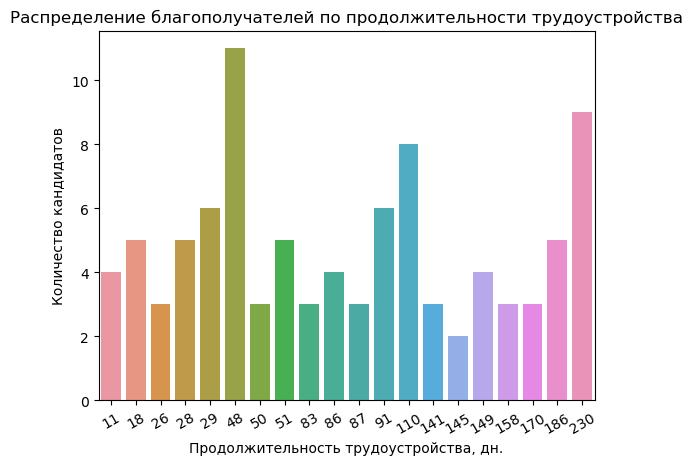

In [88]:
ax = sns.barplot(data=df_grouped, x="период_трудоустройства_в_днях", y="количество_кандидатов")
    
ax.set(xlabel='Продолжительность трудоустройства, дн.', 
       ylabel='Количество кандидатов')
plt.title('Распределение благополучателей по продолжительности трудоустройства')
plt.xticks(rotation=30)
plt.show()

<div style="border:solid green 3px; padding: 20px">
На визуализации видим, что больше всего кандидатов проработали 48 дней - 4.55%. Меньше всего проработали 145 дней - 0.83%

#####  Посмотрим, сколько в среднем и медианном значении дней благополучатели работают на одном месте по категориям 

In [89]:
df_инвалидность = df.groupby('инвалидность')['период_трудоустройства_в_днях'].median().reset_index()
df_инвалидность.columns = ['Инвалидность', 'Медиана длительности'] 
df_инвалидность['Средняя длительность'] = df.groupby('инвалидность')['период_трудоустройства_в_днях'].mean().reset_index(name='Средняя длительность')['Средняя длительность']
df_инвалидность['Средняя длительность'] = round(df_инвалидность['Средняя длительность'], 2)
df_инвалидность

,Инвалидность,Медиана длительности,Средняя длительность
0,ИСТИНА,158.5,168.49
1,ЛОЖЬ,108.0,112.00


In [90]:
df_сиротский_опыт = df.groupby('сиротский_опыт')['период_трудоустройства_в_днях'].median().reset_index()
df_сиротский_опыт.columns = ['Cиротский опыт', 'Медиана длительности'] 
df_сиротский_опыт['Средняя длительность'] = df.groupby('сиротский_опыт')['период_трудоустройства_в_днях'].mean().reset_index(name='Средняя длительность')['Средняя длительность']
df_сиротский_опыт['Средняя длительность'] = round(df_сиротский_опыт['Средняя длительность'], 2)
df_сиротский_опыт

,Cиротский опыт,Медиана длительности,Средняя длительность
0,ИСТИНА,101.0,108.79
1,ЛОЖЬ,154.5,168.14


In [91]:
df_инвалидность = df.groupby('адаптированная_образовательная_программа')['период_трудоустройства_в_днях'].median().reset_index()
df_инвалидность.columns = ['Адаптированная образовательная программа', 'Медиана длительности'] 
df_инвалидность['Средняя длительность'] = df.groupby('сиротский_опыт')['период_трудоустройства_в_днях'].mean().reset_index(name='Средняя длительность')['Средняя длительность']
df_инвалидность['Средняя длительность'] = round(df_инвалидность['Средняя длительность'], 2)
df_инвалидность

,Адаптированная образовательная программа,Медиана длительности,Средняя длительность
0,ИСТИНА,143.0,108.79
1,ЛОЖЬ,120.0,168.14


In [92]:
df_true = df[df['инвалидность'] == 'ИСТИНА']
median_инвалидность = df_true['период_трудоустройства_в_днях'].median()
mean_инвалидность = df_true['период_трудоустройства_в_днях'].mean()

df_true = df[df['сиротский_опыт'] == 'ИСТИНА']  
median_сиротский_опыт = df_true['период_трудоустройства_в_днях'].median()
mean_сиротский_опыт = df_true['период_трудоустройства_в_днях'].mean()

df_true = df[df['адаптированная_образовательная_программа'] == 'ИСТИНА']
median_адапт_программа = df_true['период_трудоустройства_в_днях'].median()
mean_адапт_программа = df_true['период_трудоустройства_в_днях'].mean()

In [93]:
result = pd.DataFrame({'Категория': ['Инвалидность', 'Сиротский опыт', 'Адаптированная программа'],
                       'Медиана длительности': [median_инвалидность, median_сиротский_опыт, median_адапт_программа],
                       'Средняя длительность': [mean_инвалидность, mean_сиротский_опыт, mean_адапт_программа]})
result = result.sort_values(by='Медиана длительности', ascending=False)
result['Средняя длительность'] = round(result['Средняя длительность'], 2)
result

,Категория,Медиана длительности,Средняя длительность
0,Инвалидность,158.5,168.49
2,Адаптированная программа,143.0,161.90
1,Сиротский опыт,101.0,108.79


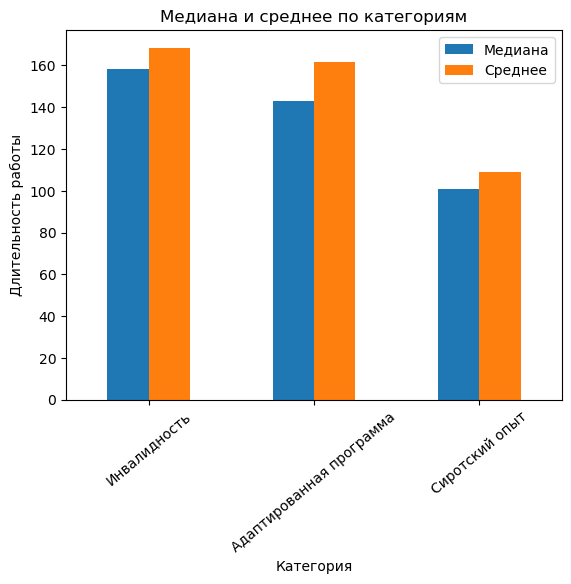

In [94]:
ax = result.plot.bar(x='Категория', rot=0)

ax.set_ylabel('Длительность работы')
ax.set_title('Медиана и среднее по категориям')
ax.legend(labels=['Медиана', 'Среднее'])
plt.xticks(rotation=40)
plt.show()

<div style="border:solid green 3px; padding: 20px">
Самое больше среднее - 158 дней и медианное значение - 168 дней у категории кандидатов с инвалидностью, наименьшее у категории с сиротским опытом, среднее 101, медиана 108 дней. 	

###  Посмотрим распределение по полу,  сколько в среднем и медианном значении дней благополучатели работают

In [95]:
df_пол = df.groupby('пол')['период_трудоустройства_в_днях'].median().reset_index() 
df_пол.columns = ['Пол', 'Медиана длительности']
df_пол['Средняя длительность'] = df.groupby('пол')['период_трудоустройства_в_днях'].mean().reset_index(name='Средняя длительность')['Средняя длительность']
df_пол['Средняя длительность'] = round(df_пол['Средняя длительность'], 2)
df_пол

,Пол,Медиана длительности,Средняя длительность
0,Женский,110.0,136.39
1,Мужской,147.0,157.07


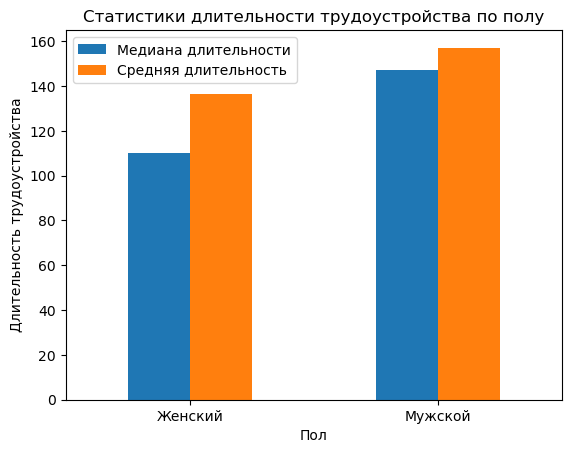

In [96]:
ax = df_пол.plot(x='Пол', kind='bar', rot=0)
ax.set_ylabel('Длительность трудоустройства')
ax.set_title('Статистики длительности трудоустройства по полу')
plt.show()

<div style="border:solid green 3px; padding: 20px">
Видим, что более длительный период трудоустройства у мужчин (медиана 147 дней, среднее 157 дней), чем у женщин	(медиана 110 дней, среднее 136 дней)

#####  Посмотрим осмотрим распределение по возрасту, сколько в среднем и медианном значении дней благополучатели работают

In [97]:
df_возраст = df.groupby('возраст')['период_трудоустройства_в_днях'].median().reset_index() 
df_возраст.columns = ['Возраст', 'Медиана длительности']
df_возраст['Средняя длительность'] = df.groupby('возраст')['период_трудоустройства_в_днях'].mean().reset_index(name='Средняя длительность')['Средняя длительность']
df_возраст['Средняя длительность'] = round(df_возраст['Средняя длительность'], 2)
df_возраст.sort_values('Медиана длительности', ascending=False)

,Возраст,Медиана длительности,Средняя длительность
14,28,291.0,233.36
15,29,289.5,293.67
16,30,229.0,187.33
19,33,211.5,202.88
7,21,208.0,203.00
12,26,182.5,177.00
9,23,182.5,208.22
11,25,176.5,205.60
13,27,153.0,127.57
17,31,143.0,134.71


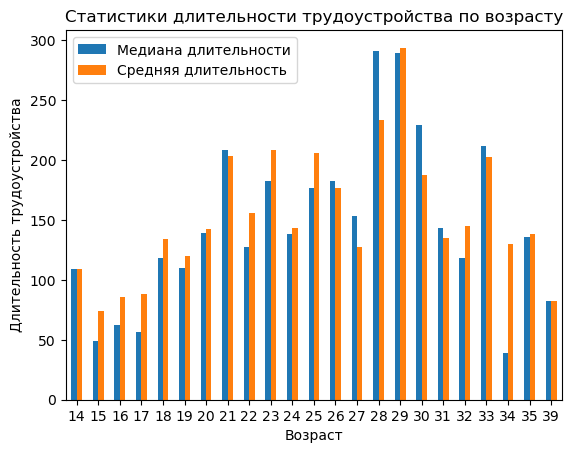

In [98]:
ax = df_возраст.plot(x='Возраст', kind='bar', rot=0)
ax.set_ylabel('Длительность трудоустройства')
ax.set_title('Статистики длительности трудоустройства по возрасту')
plt.show()

<div style="border:solid green 3px; padding: 20px">
Видим, что медиана и среднее совпадают в самом высоком значении 29 лет, топ 3 по медиане это 28-30 лет. Самое низкое значение и по медиане, и по среднему 15-17 лет, только по медиане 34 года. 

#####  Посмотрим, сколько в среднем и медианном значении дней благополучатели работают по типу опыта работы

In [99]:
df_тип_опыта_работы = df.groupby('тип_опыта_работы')['период_трудоустройства_в_днях'].median().reset_index() 
df_тип_опыта_работы.columns = ['Тип опыта работы', 'Медиана длительности']
df_тип_опыта_работы['Средняя длительность'] = df.groupby('тип_опыта_работы')['период_трудоустройства_в_днях'].mean().reset_index(name='Средняя длительность')['Средняя длительность']
df_тип_опыта_работы['Средняя длительность'] = round(df_тип_опыта_работы['Средняя длительность'], 2)
df_тип_опыта_работы

,Тип опыта работы,Медиана длительности,Средняя длительность
0,Первый,114.0,133.51
1,Повторный,174.0,189.01


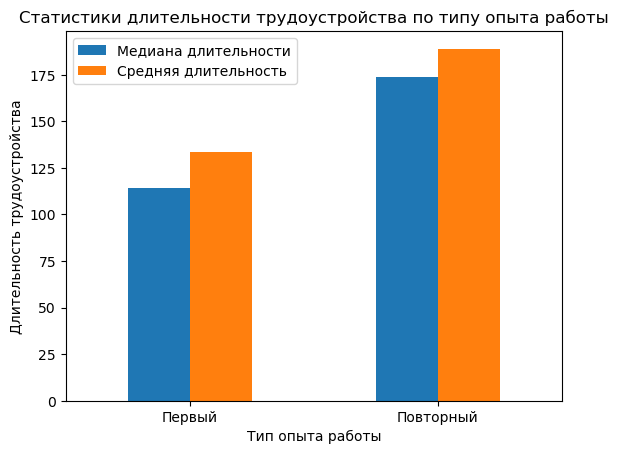

In [100]:
ax = df_тип_опыта_работы.plot(x='Тип опыта работы', kind='bar', rot=0)
ax.set_ylabel('Длительность трудоустройства')
ax.set_title('Статистики длительности трудоустройства по типу опыта работы')
plt.show()

<div style="border:solid green 3px; padding: 20px">
Повторный ( медиана 174 дня, среднее 189 дней) опыт трудоустройства более длительный, чем первый (медиана 114, среднее 133 дня). 

#####  Посмотрим, сколько в среднем и медианном значении дней благополучатели работают по типу площадки

In [101]:
df_тип_площадки = df.groupby('тип_площадки')['период_трудоустройства_в_днях'].median().reset_index() 
df_тип_площадки.columns = ['Тип площадки работы', 'Медиана длительности']
df_тип_площадки['Средняя длительность'] = df.groupby('тип_площадки')['период_трудоустройства_в_днях'].mean().reset_index(name='Средняя длительность')['Средняя длительность']
df_тип_площадки['Средняя длительность'] = round(df_тип_площадки['Средняя длительность'], 2)
df_тип_площадки

,Тип площадки работы,Медиана длительности,Средняя длительность
0,Внешняя,140.5,154.66
1,Внутренняя,108.0,115.90


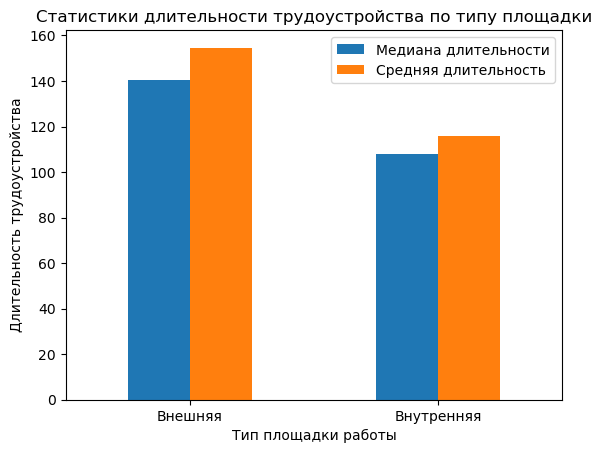

In [102]:
ax = df_тип_площадки.plot(x='Тип площадки работы', kind='bar', rot=0)
ax.set_ylabel('Длительность трудоустройства')
ax.set_title('Статистики длительности трудоустройства по типу площадки')
plt.show()

<div style="border:solid green 3px; padding: 20px">
По таблице и визуализации видно, что на внешних площадках (медиана 140.5 дней, среднее 154.66 дней) длительность трудоустройства выше, чем на внутренних (медиана 108 дней, среднее 115.90 дней). 

#####  Посмотрим, сколько в среднем и медианном значении дней благополучатели работают по типу трудоустройства

In [103]:
df_тип_трудоустройства = df.groupby('тип_трудоустройства')['период_трудоустройства_в_днях'].median().reset_index() 
df_тип_трудоустройства.columns = ['Тип трудоустройства', 'Медиана длительности']
df_тип_трудоустройства['Средняя длительность'] = df.groupby('тип_трудоустройства')['период_трудоустройства_в_днях'].mean().reset_index(name='Средняя длительность')['Средняя длительность']
df_тип_трудоустройства['Средняя длительность'] = round(df_тип_трудоустройства['Средняя длительность'], 2)
df_тип_трудоустройства

,Тип трудоустройства,Медиана длительности,Средняя длительность
0,Временное трудоустройство,110.0,132.56
1,Открытый рынок без сопровождения,158.0,176.55
2,Открытый рынок с сопровождением,152.0,157.86


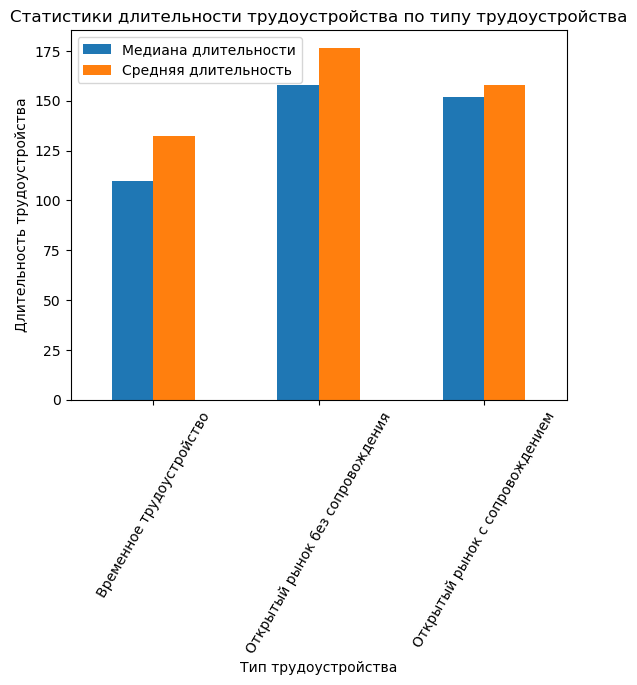

In [104]:
ax = df_тип_трудоустройства.plot(x='Тип трудоустройства', kind='bar', rot=0)
ax.set_ylabel('Длительность трудоустройства')
ax.set_title('Статистики длительности трудоустройства по типу трудоустройства')
plt.xticks(rotation=60)
plt.show()

<div style="border:solid green 3px; padding: 20px">
Видим, что самая большая длительность трудоустройства при типе трудоустройства Открытый рынок с сопровождением (медиана 152, среднее 157). Наименьшая у временного трудоустройства, медиана 110 дней, среднее 132 дня. 

### Посмотрим период, в который больше всего трудоустроенных уникальных благополучателей в разбивке по месяцам с учетом года, месяца

#### Создадим столбец с годом и месяцем начала и заверешения трудоустройства для дальнейшего анализа

In [105]:
df['год_месяц_начала_трудоустройства'] = df['год_начала_трудоустройства'].astype(str) + '-' + df['месяц_начала_трудоустройства'].astype(str)
df.head()

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,...,тип_трудоустройства,тип_опыта_работы,регион_код,провайдер_код,период_трудоустройства_в_днях,год_начала_трудоустройства,месяц_начала_трудоустройства,год_завершения_трудоустройства,месяц_завершения_трудоустройства,год_месяц_начала_трудоустройства
0,0,1,Женский,25,2018-12-06,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-16,2023-11-19,...,Открытый рынок без сопровождения,Повторный,reg200,prov3500,307,2023,1,2023,11,2023-1
1,1,2,Мужской,28,2021-09-22,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-09,2023-11-19,...,Открытый рынок с сопровождением,Повторный,reg200,prov3500,314,2023,1,2023,11,2023-1
2,2,3,Женский,31,2016-07-08,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18,2023-06-30,...,Открытый рынок без сопровождения,Повторный,reg200,prov3500,73,2023,4,2023,6,2023-4
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,...,Открытый рынок без сопровождения,Повторный,reg200,prov3500,39,2022,11,2022,12,2022-11
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,...,Открытый рынок без сопровождения,Повторный,reg200,prov3500,8,2023,3,2023,3,2023-3


In [106]:
df['год_месяц_завершения_трудоустройства'] = df['год_завершения_трудоустройства'].astype(str) + '-' + df['месяц_завершения_трудоустройства'].astype(str)
df.head()

,Unnamed: 0,id_кандидата,пол,возраст,дата_добавления,инвалидность,сиротский_опыт,адаптированная_образовательная_программа,начало_трудоустройства,завершение_трудоустройства,...,тип_опыта_работы,регион_код,провайдер_код,период_трудоустройства_в_днях,год_начала_трудоустройства,месяц_начала_трудоустройства,год_завершения_трудоустройства,месяц_завершения_трудоустройства,год_месяц_начала_трудоустройства,год_месяц_завершения_трудоустройства
0,0,1,Женский,25,2018-12-06,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-16,2023-11-19,...,Повторный,reg200,prov3500,307,2023,1,2023,11,2023-1,2023-11
1,1,2,Мужской,28,2021-09-22,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-01-09,2023-11-19,...,Повторный,reg200,prov3500,314,2023,1,2023,11,2023-1,2023-11
2,2,3,Женский,31,2016-07-08,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-04-18,2023-06-30,...,Повторный,reg200,prov3500,73,2023,4,2023,6,2023-4,2023-6
3,3,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2022-11-21,2022-12-30,...,Повторный,reg200,prov3500,39,2022,11,2022,12,2022-11,2022-12
4,4,4,Мужской,34,2022-10-07,ИСТИНА,ЛОЖЬ,ЛОЖЬ,2023-03-22,2023-03-30,...,Повторный,reg200,prov3500,8,2023,3,2023,3,2023-3,2023-3


In [107]:
top_15_start_date = df.groupby('год_месяц_начала_трудоустройства')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
top_15_start_date.sort_values('количество_кандидатов', ascending=False).head(20)

,год_месяц_начала_трудоустройства,количество_кандидатов
5,2023-4,46
9,2023-8,38
7,2023-6,35
8,2023-7,31
6,2023-5,30
4,2023-3,20
3,2023-2,16
0,2022-11,15
1,2022-12,15
2,2023-1,12


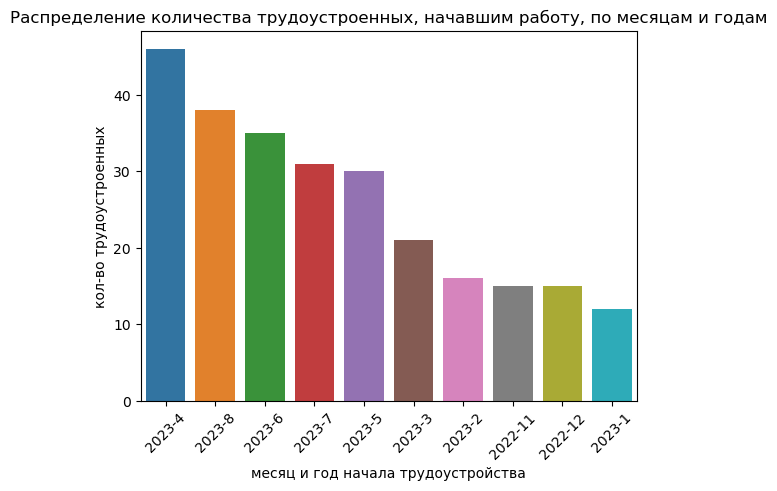

In [108]:
df_grouped = df.groupby('год_месяц_начала_трудоустройства')['id_кандидата'].agg(['count']).reset_index()

df_grouped = df_grouped.sort_values('count', ascending=False)

order = df_grouped['год_месяц_начала_трудоустройства'].values

ax = sns.barplot(data=df_grouped, x='год_месяц_начала_трудоустройства', y='count', order=order)

plt.xlabel('месяц и год начала трудоустройства')
plt.ylabel('кол-во трудоустроенных')
plt.title('Распределение количества трудоустроенных, начавшим работу, по месяцам и годам')
plt.xticks(rotation=45)
plt.show()

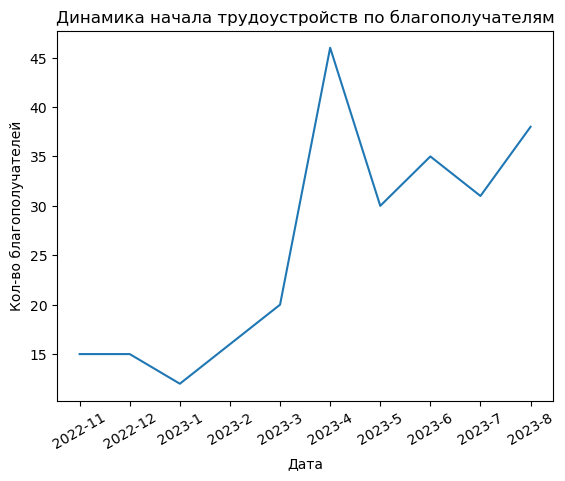

In [109]:
ax = sns.lineplot(data=top_15_start_date, x="год_месяц_начала_трудоустройства", y="количество_кандидатов")
ax.set_xlabel('Дата')
ax.set_ylabel('Кол-во благополучателей')
plt.title('Динамика начала трудоустройств по благополучателям')
plt.xticks(rotation=30);
plt.show()

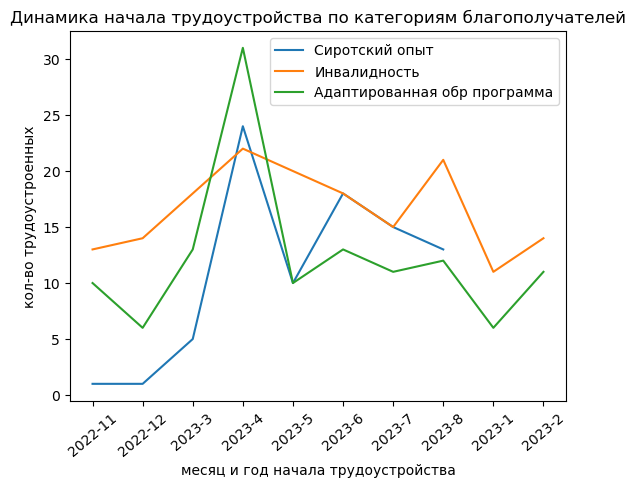

In [110]:
df_сиротский_опыт = df[df['сиротский_опыт'] == 'ИСТИНА']
df_инвалидность = df[df['инвалидность'] == 'ИСТИНА']
df_адапт_обр_программа = df[df['адаптированная_образовательная_программа'] == 'ИСТИНА']

# Агрегируем по дате 
df_сиротский_опыт = df_сиротский_опыт.groupby('год_месяц_начала_трудоустройства')['id_кандидата'].count().reset_index()
df_инвалидность = df_инвалидность.groupby('год_месяц_начала_трудоустройства')['id_кандидата'].count().reset_index() 
df_адапт_обр_программа = df_адапт_обр_программа.groupby('год_месяц_начала_трудоустройства')['id_кандидата'].count().reset_index()

# Строим график
ax = sns.lineplot(data=df_сиротский_опыт, x="год_месяц_начала_трудоустройства", y="id_кандидата", label='Сиротский опыт')
ax = sns.lineplot(data=df_инвалидность, x="год_месяц_начала_трудоустройства", y="id_кандидата", label='Инвалидность') 
ax = sns.lineplot(data=df_адапт_обр_программа, x="год_месяц_начала_трудоустройства", y="id_кандидата", label='Адаптированная обр программа')

plt.xlabel('месяц и год начала трудоустройства')
plt.ylabel('кол-во трудоустроенных')
plt.title('Динамика начала трудоустройства по категориям благополучателей')
plt.xticks(rotation=40)
ax.legend()
plt.show()

<div style="border:solid green 3px; padding: 20px">
Видим, что больше трудоустроенных в апреле 2024г., меньше всего в январе 2023г. С ноября 2022 динамика идет вверх, кроме просада в в январе 2023г., после подъема в апреле 2024г., снова идет спад. Также, если рассматривать динамику по категориям кандидатов видим, что идет подъем по адаптир учебная программа, сиротский опыт, инвалидность с макс значением в апреле 2024г.Затем идет спад и небольшие скачки в июне 2023, августе 2023.  Также видим, что по категории иванлидность динамику более стальная, резких скачов меньше, чем по 2 другим категориям. 

In [111]:
top_15_finish_date = df.groupby('завершение_трудоустройства')['id_кандидата'].nunique().reset_index().rename(columns={'id_кандидата':'количество_кандидатов'})
top_15_finish_date.sort_values('количество_кандидатов', ascending=False).head(15)

,завершение_трудоустройства,количество_кандидатов
35,2023-11-19,174
16,2023-06-15,22
28,2023-07-31,8
13,2023-05-31,7
0,2022-12-30,6
20,2023-06-30,4
9,2023-04-28,3
4,2023-03-10,3
34,2023-08-31,3
17,2023-06-16,2


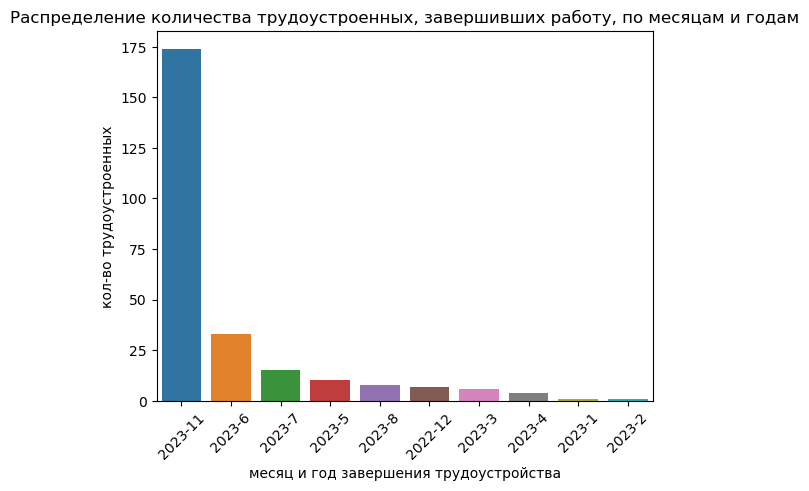

In [112]:
df_grouped = df.groupby('год_месяц_завершения_трудоустройства')['id_кандидата'].agg(['count']).reset_index()

df_grouped = df_grouped.sort_values('count', ascending=False)

order = df_grouped['год_месяц_завершения_трудоустройства'].values

ax = sns.barplot(data=df_grouped, x='год_месяц_завершения_трудоустройства', y='count', order=order)

plt.xlabel('месяц и год завершения трудоустройства')
plt.ylabel('кол-во трудоустроенных')
plt.title('Распределение количества трудоустроенных, завершивших работу, по месяцам и годам')
plt.xticks(rotation=45)
plt.show()

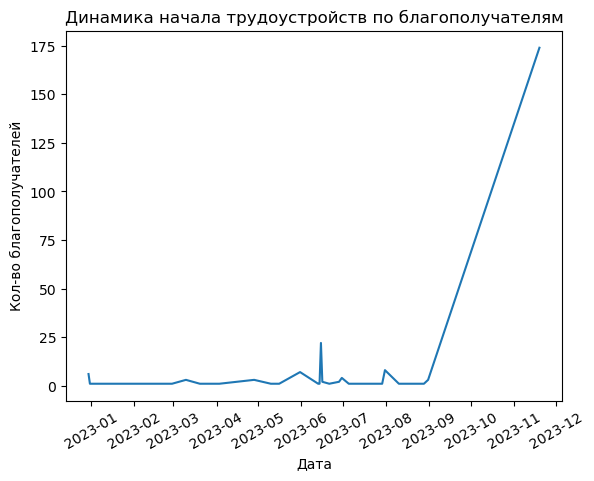

In [113]:
ax = sns.lineplot(data=top_15_finish_date, x="завершение_трудоустройства", y="количество_кандидатов")
ax.set_xlabel('Дата')
ax.set_ylabel('Кол-во благополучателей')
plt.title('Динамика начала трудоустройств по благополучателям')
plt.xticks(rotation=30);
plt.show()

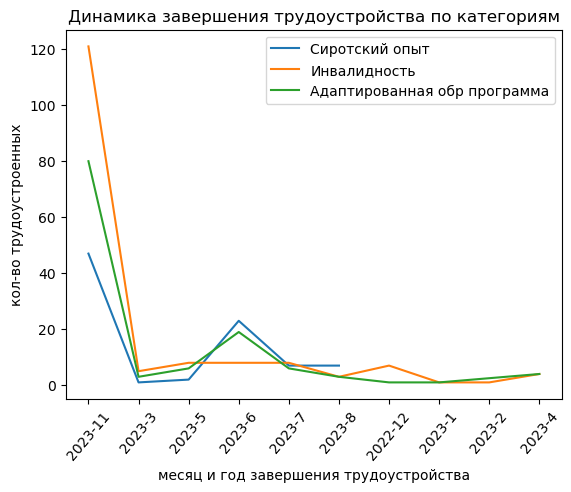

In [114]:

df_сиротский_опыт = df[df['сиротский_опыт'] == 'ИСТИНА'] 

df_инвалидность = df[df['инвалидность'] == 'ИСТИНА']

df_адапт_обр_программа = df[df['адаптированная_образовательная_программа'] == 'ИСТИНА']



df_сиротский_опыт = df_сиротский_опыт.groupby('год_месяц_завершения_трудоустройства')['id_кандидата'].count().reset_index()
df_инвалидность = df_инвалидность.groupby('год_месяц_завершения_трудоустройства')['id_кандидата'].count().reset_index()  
df_адапт_обр_программа = df_адапт_обр_программа.groupby('год_месяц_завершения_трудоустройства')['id_кандидата'].count().reset_index()

# Строим график 
ax = sns.lineplot(data=df_сиротский_опыт, x="год_месяц_завершения_трудоустройства", y="id_кандидата", label='Сиротский опыт')

ax = sns.lineplot(data=df_инвалидность, x="год_месяц_завершения_трудоустройства", y="id_кандидата", label='Инвалидность')

ax = sns.lineplot(data=df_адапт_обр_программа, x="год_месяц_завершения_трудоустройства", y="id_кандидата", label='Адаптированная обр программа') 

# оформление  
plt.legend()
plt.xticks(rotation=50) 
plt.title('Динамика завершения трудоустройства по категориям')
plt.xlabel('месяц и год завершения трудоустройства')
plt.ylabel('кол-во трудоустроенных')
plt.show()

<div style="border:solid green 3px; padding: 20px">
Видим, что больше трудоустроенных в апреле 2024г., меньше всего в январе 2023г. С ноября 2022 динамика идет вверх, кроме просада в в январе 2023г., после подъема в апреле 2024г., снова идет спад. Также, если рассматривать динамику по категориям кандидатов видим, что идет подъем по адаптир учебная программа, сиротский опыт, инвалидность с макс значением в апреле 2024г.Затем идет спад и небольшие скачки в июне 2023, августе 2023.  Также видим, что по категории иванлидность динамику более стальная, резких скачов меньше, чем по 2 другим категориям. 

### Проверка статистических гипотез

##### Проверим 2 гипотезы: 
**Сформулируем гипотезы**

**Гипотеза 1 Существует зависимость между типом трудоустройства и длительностью трудоустройства**

H1 Длительность трудоустройства независимо от типа трудоустройства одинаковая

H0 Тип трудоустройства влияет на длительность трудоустройства

**Гипотеза 2 У благополучателей с повторным опытом работы длительность трудоустройства в среднем выше**

H0: Длительность трудоустройства у благополучателей с разным опытом трудоустройства одинаковая

H1:  У кандидатов с повторным опытом работы длительность трудоустройства в среднем больше

Для первой гипотезы используем Дисперсионный анализ ANOVA, т.к. нам нужно проверить тип трудоустройства с 3 вариантами. Мы можем разбить на 3 группы и сравнить среднее значение длительности трудоустройства. Не требуется предположений о нормальности распределения и однородности дисперсий, т.к. у нас достаточно большой объем данных в каждой группе.

Для второй гипотезы мы берем критерий Стьюдента для независимых выборок, он даёт возможность сравнить средние показатели длительности, у нас есть несколько независимых выборок по категориям.  Это наиболее прямой способ выявить различия в продолжительности трудоустройства

Критерий Стьюдента не требует большого объёма данных и позволяет работать даже с относительно малыми выборками, если распределение не сильно отклоняется от нормального.
Также этот критерий достаточно прост в интерпретации - сравниваются конкретные средние значения показателей.

#### Проверяем первую гипотезу о зависимости между типом опыта работы и длительностью трудоустройства

In [117]:
# Фильтруем по опыту работы
first_job = df[df["тип_опыта_работы"] == "Первый"]  
repeated_job = df[df["тип_опыта_работы"] == "Повторный"]

# Извлекаем длительность работы  
first_duration = first_job["период_трудоустройства_в_днях"]
repeated_duration = repeated_job["период_трудоустройства_в_днях"]

# Проводим тест Стьюдента  
tstat, pvalue = stats.ttest_ind(first_duration, repeated_duration)

print(f"p-value: {pvalue}") 

# Проверяем значимость
alpha = 0.05
if pvalue > alpha:
    print("Нет статистически значимых различий между выборками, гипотеза подтвердилась")
else:
    print("Есть статистически значимые различия между выборками, гипотеза не подтвердилась")

p-value: 3.972399814172367e-05
Есть статистически значимые различия между выборками


<div style="border:solid purple 3px; padding: 20px">
    
Проверив гипотезу о том, что есть зависимость между типом опыта работы и длительностью трудоустройства. Мы выявили, что статистически значимые разлия есть и гипотеза не подтвердилась., т.е. тип опыта работы влияет на длительность трудоустройства    

#### Проверяем первую гипотезу о зависимости между типом трудоустройства и длительностью трудоустройства

In [123]:
group1 = df[df["тип_трудоустройства"] == "Временное трудоустройство"]["период_трудоустройства_в_днях"]  
group2 = df[df["тип_трудоустройства"] == "Открытый рынок с сопровождением"]["период_трудоустройства_в_днях"]
group3 = df[df["тип_трудоустройства"] == "Открытый рынок без сопровождения"]["период_трудоустройства_в_днях"]

fstat, pvalue = f_oneway(group1, group2, group3)
print(pvalue)

# Проверяем значимость
alpha = 0.05
if pvalue > alpha:
    print("Нет статистически значимых различий между выборками, гипотеза подтвердилась")
else:
    print("Есть статистически значимые различия между выборками, гипотеза не подтвердилась")

0.02035374692189935
Есть статистически значимые различия между выборками, гипотеза не подтвердилась


<div style="border:solid purple 3px; padding: 20px">
    
Проверив гипотезу о том, что есть зависимость между типом трудоустройства и длительностью трудоустройства. Мы выявили, что статистически значимые разлия есть и гипотеза не подтвердилась., т.е. тип трудоустройства влияет на длительность трудоустройства      

<div style="border:solid green 3px; padding: 20px">

**Итоговый вывод:**
    
На основе проведенного анализа данных о трудоустройстве благополучателей благотворительного фонда Рауль можно сделать следующие ключевые выводы:

Большинство трудоустроенных благополучателей - мужчины (56.2%).
    
Средний возраст составляет 22 года.
    
62.55% имеют инвалидность, 35.12% - опыт социального сиротства, 47.74% учились по адаптированной программе.
    
83.47% благополучателей работали на внешних площадках. 49.2% были временно трудоустроены, 34.8% - на открытом рынке с сопровождением. 73.26% проходили первый опыт работы.71.9% трудоустроенных из региона reg200. 
    
Больше всего благополучателей у провайдера prov3500 (54.13%).
    
Средняя длительность трудоустройства составила 148 дней, медиана - 136 дней. Дольше всего работают благополучатели с инвалидностью (медиана 158 дней) и с повторным опытом трудоустройства (медиана 174 дня).
    
Больше всего трудоустроенных в апреле 2024 года, пик динамики наблюдается весной. Также отмечен подъем осенью 2022 года.
    
Проверка гипотез показала наличие статистически значимой зависимости между типом трудоустройства, опытом работы и длительностью периода трудоустройства.